# Gross Domestic Product Analysis

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("gdp.csv")
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


In [14]:
df.dtypes

Country Name     object
Country Code     object
Year              int64
Value           float64
dtype: object

In [15]:
df.describe()

,Year,Value
count,11507.000000,1.150700e+04
mean,1991.265230,1.005972e+12
std,15.886648,4.533056e+12
min,1960.000000,8.824448e+06
25%,1978.000000,2.056874e+09
50%,1993.000000,1.436880e+10
75%,2005.000000,1.796394e+11
max,2016.000000,7.904923e+13


In [17]:
df.shape

(11507, 4)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

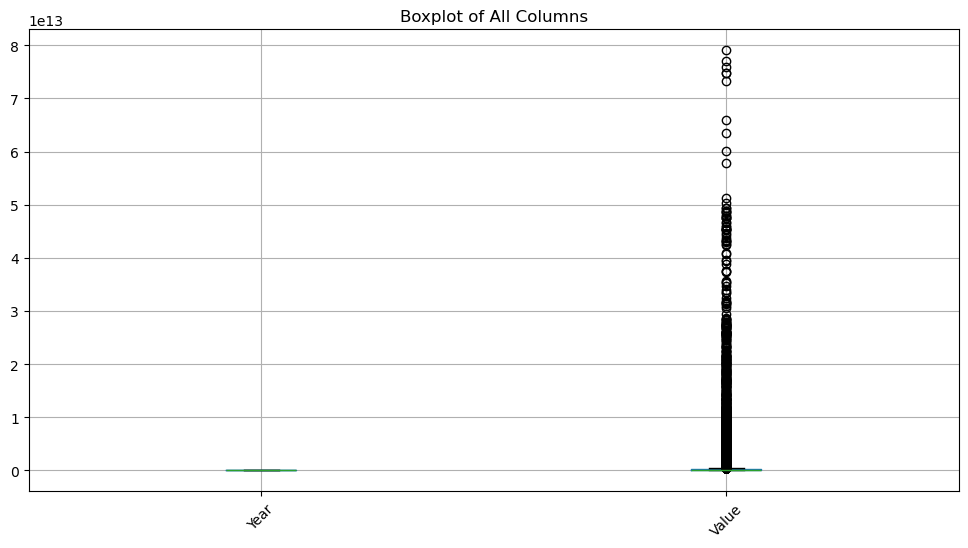

In [20]:
plt.figure(figsize=(12, 6))  # adjust figure size if needed
df.boxplot()
plt.title("Boxplot of All Columns")
plt.xticks(rotation=45)  # rotate x-axis labels if needed
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


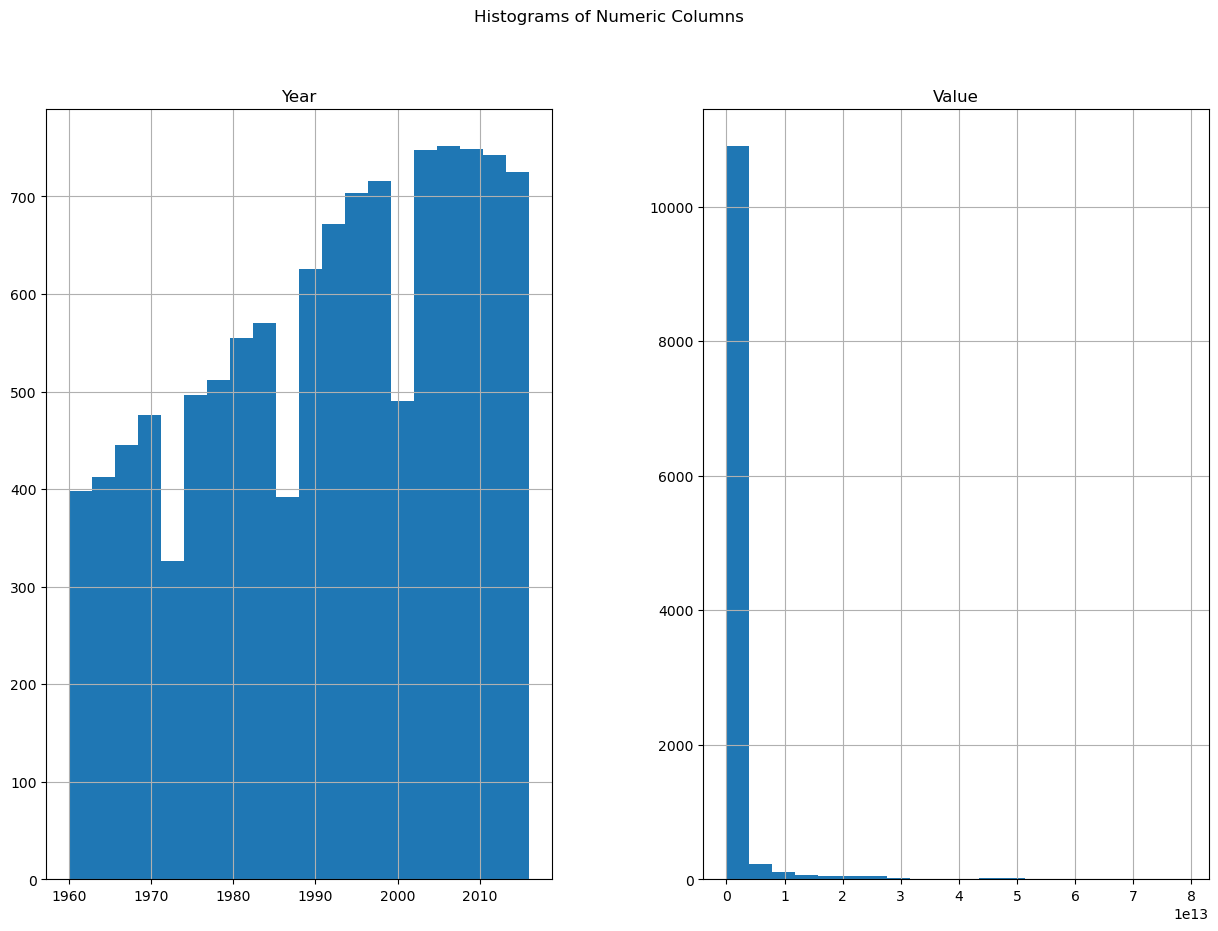

In [24]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numeric Columns")
plt.show()

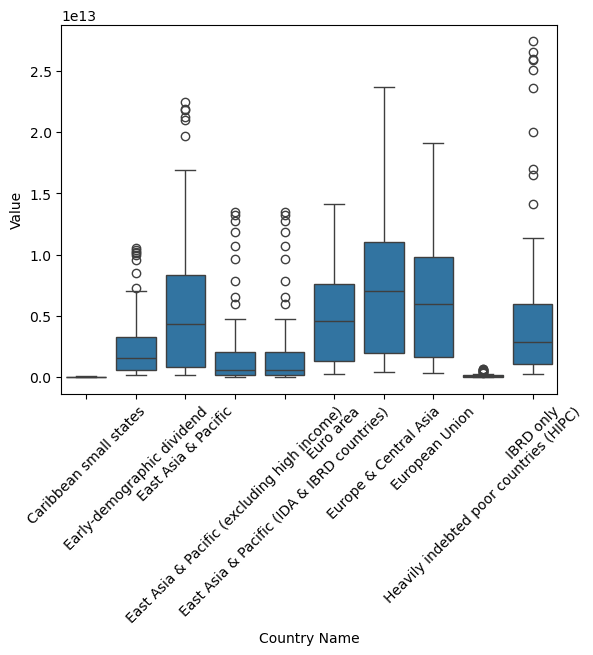

In [26]:
top_countries = df['Country Name'].value_counts().index[:10]
filtered = df[df['Country Name'].isin(top_countries)]

sns.boxplot(x='Country Name', y='Value', data=filtered)
plt.xticks(rotation=45)
plt.show()

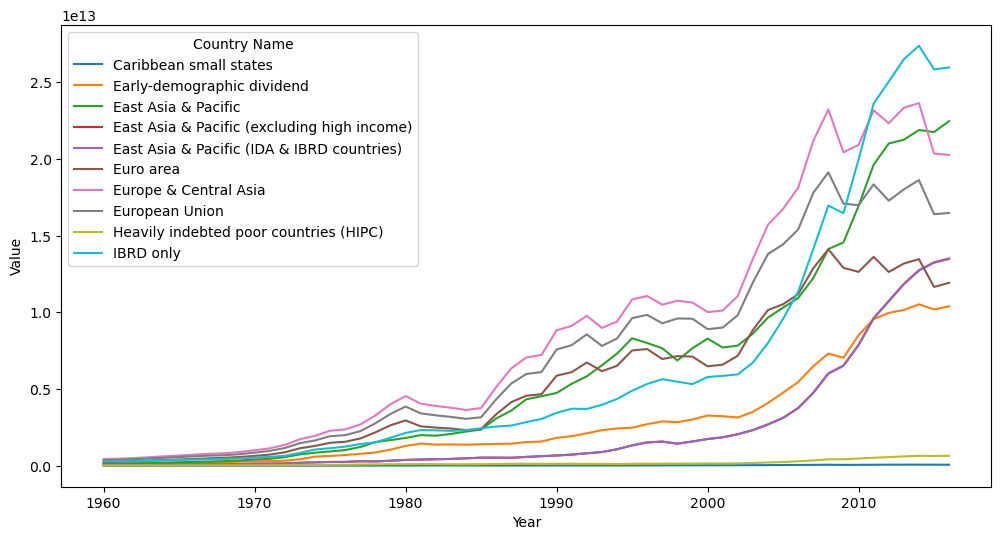

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Value', hue='Country Name', data=filtered)
plt.show()

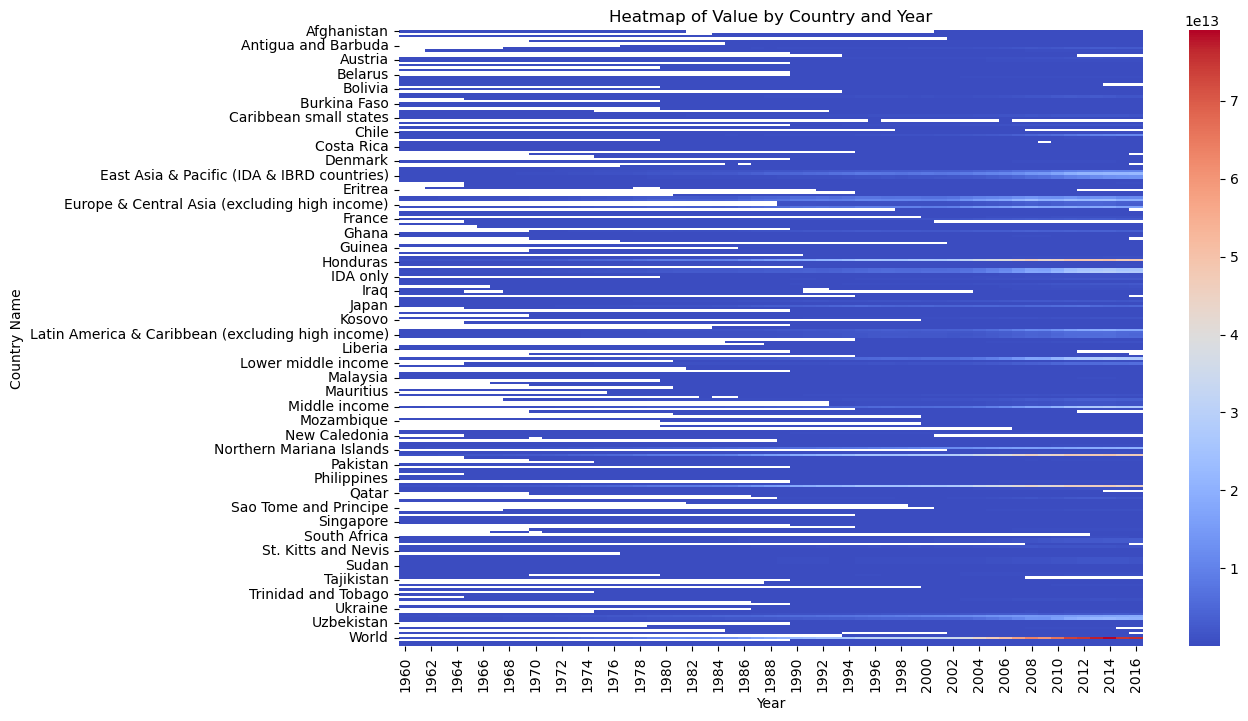

In [28]:
pivot = df.pivot_table(values='Value', 
                       index='Country Name', 
                       columns='Year')

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="coolwarm")
plt.title("Heatmap of Value by Country and Year")
plt.show()

The heatmap displays values by country from 1960 to 2016, with color intensity representing magnitude (higher values in red, lower in blue).
Most countries show gradual increases over time, especially from the 1990s onward.
High-income and rapidly developing regions exhibit stronger growth and brighter color intensities in later years.
Lower-income countries generally maintain lower value levels, with slower growth patterns.
The “World” aggregate shows a clear upward trend, reflecting overall global growth across the period.
